In [28]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import collections
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")

## Problem Statement :
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R/Python and achieve the following goals:
1. Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized
2. Present the financial benefit of this project to the marketing team


In [4]:
df1 = pd.read_csv("bank-additional-full.csv",sep=";")

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

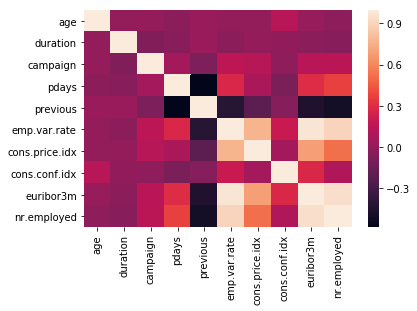

In [6]:
sns.heatmap(df1.corr())

### Analysis of Heat Map :
1. Data is non-linear because there are dark squares in the heatmap
2. No two attributes are completely correlated

### Box Plot of the numerical features with respect to the target variable :

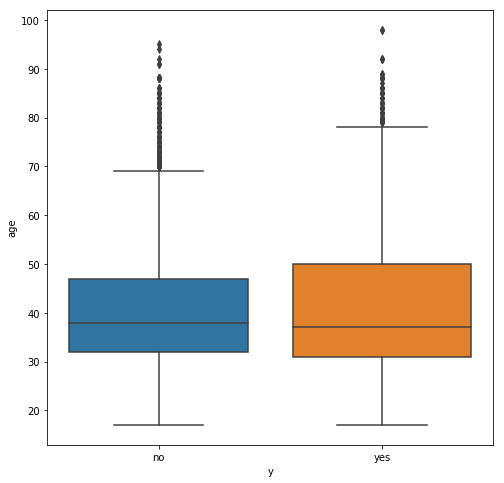

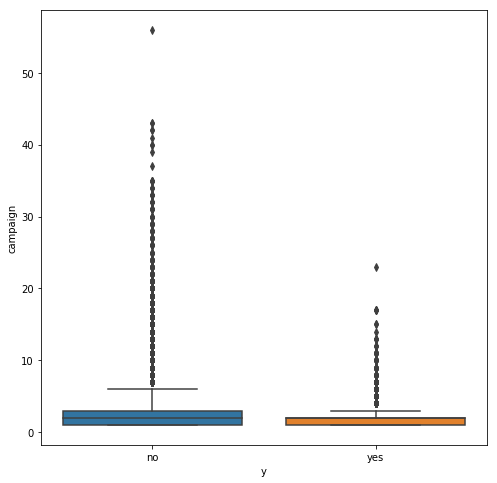

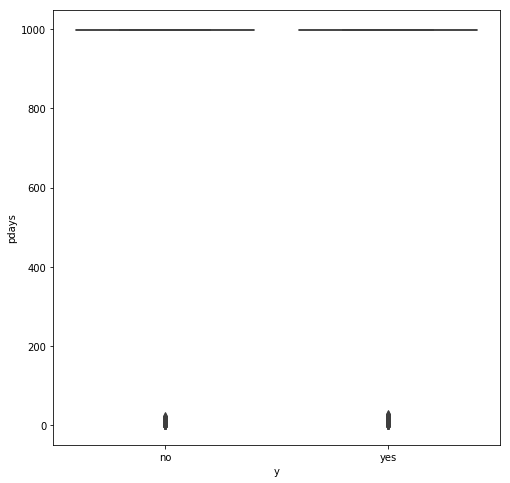

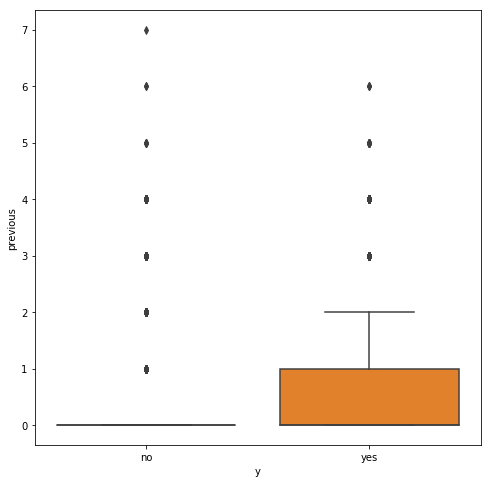

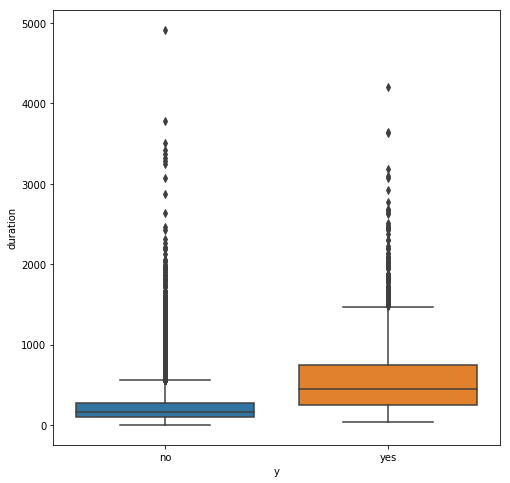

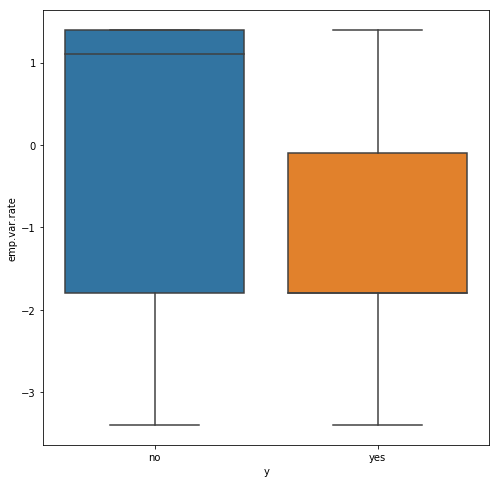

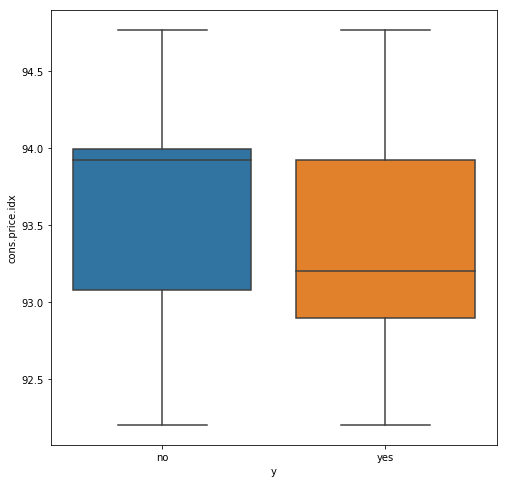

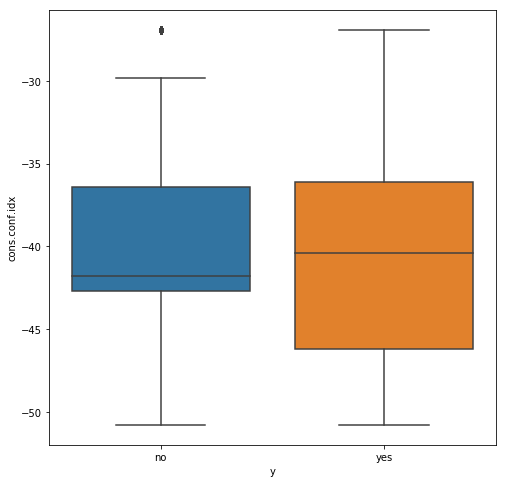

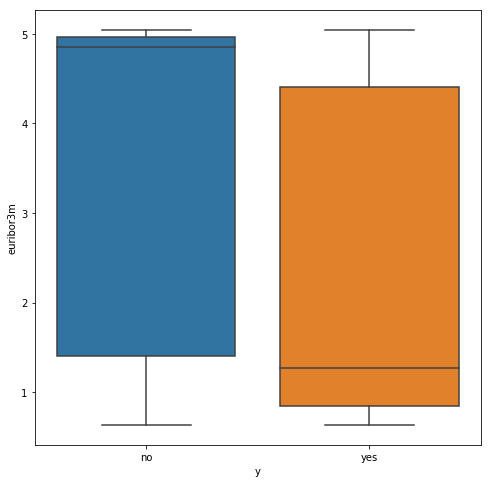

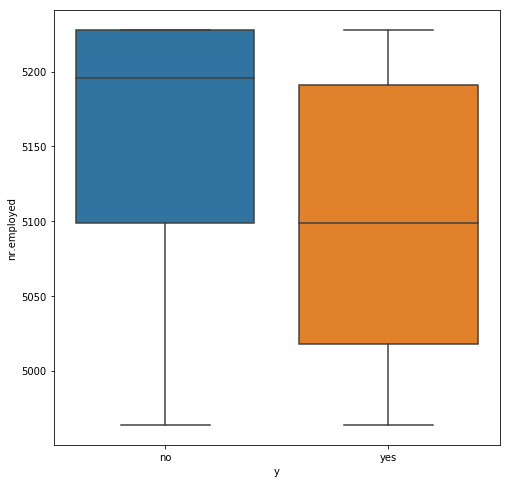

In [23]:
numeric=["age", "campaign", "pdays", "previous", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
categorical=[i for i in df1.columns if i not in numeric]
categorical.remove("y")
target="y"
for i in numeric:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=target,y=i,data=df1)
    plt.show()

 ### We are using an Ensemble Method - Random Forest, to calculate the feature importances for this dataset

In [63]:
dict1 = df1.T.to_dict().values()
vec = DictVectorizer()
array = vec.fit_transform(dict1).toarray()
feature_names = vec.get_feature_names()
X = array[:,:-2]
X = np.hstack((X[:,:14],X[:,15:]))
y = array[:,-1]
df = pd.DataFrame(array,columns=feature_names)
forest = RandomForestClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
imp = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(imp)[::-1]
print("Ranking of Features :")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], imp[indices[f]]))

Ranking of Features :
1. age (0.164047)
2. emp.var.rate (0.117021)
3. campaign (0.083560)
4. month=sep (0.049478)
5. nr.employed (0.034052)
6. cons.conf.idx (0.027570)
7. cons.price.idx (0.023012)
8. poutcome=nonexistent (0.022943)
9. education=unknown (0.022474)
10. euribor3m (0.021194)
11. housing=unknown (0.021185)
12. housing=yes (0.017653)
13. marital=divorced (0.016720)
14. education=basic.9y (0.016283)
15. education=professional.course (0.016191)
16. marital=married (0.014782)
17. day_of_week=mon (0.014618)
18. day_of_week=wed (0.014473)
19. poutcome=success (0.014427)
20. day_of_week=thu (0.014243)
21. day_of_week=tue (0.014166)
22. job=student (0.014008)
23. job=unknown (0.014003)
24. loan=unknown (0.013831)
25. day_of_week=fri (0.013753)
26. education=illiterate (0.011851)
27. job=admin. (0.011798)
28. education=basic.6y (0.011275)
29. loan=yes (0.010415)
30. job=housemaid (0.009447)
31. job=self-employed (0.009024)
32. contact=telephone (0.008300)
33. duration (0.008157)
34.

### Analysis :
From the Feature Rnking, we cn clearly see that below are the top 3 most important features - 
1. age (0.164047)
2. emp.var.rate (0.117021)
3. campaign (0.083560)

### Plot Campaign vs if the customer took the policy

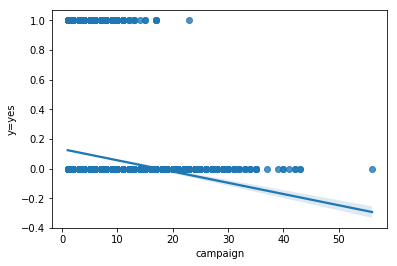

In [36]:
ax = sns.regplot(x="campaign", y="y=yes", order=1, data=df, truncate=True)

### Plot Emp.Var.Rate vs if the customer took the policy

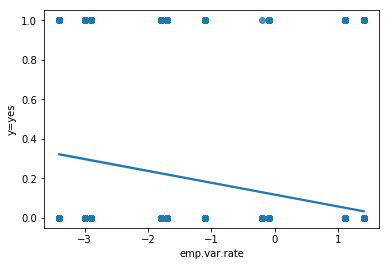

In [37]:
ax = sns.regplot(x="emp.var.rate", y="y=yes", order=1, data=df, truncate=True)

### Plot Age vs if the customer took the policy

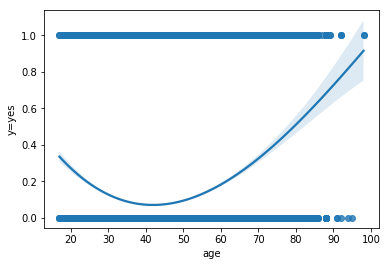

In [38]:
ax = sns.regplot(x="age", y="y=yes", order=3, data=df, truncate=True)

## Analysis :
After 20 times campaign call, the "Yes" value is almost zero. So we can stop calling after 20 times. Let's check how much we can maximize market cost reduction by acquiring maximum sales by dropping campaign call after 20 times.

In [89]:
# Calculate calls made in total
total_call = np.sum(df['campaign'])
print(total_call)
# Calculate calls made after the 20th call
extra_call = np.sum(df[df['campaign']>20]['campaign']) - 20*df[df['campaign']>20].shape[0]
print(extra_call)
# Calculate reduction in marketing cost
reduction = ( extra_calls *100 ) / total_calls
print("Reduction : ",reduction)
total_sale=np.float(df[df['y=yes']==1].shape[0])
print(total_sale)
less_sale=np.float(df[(df['campaign'] <= 20) & (df['y=yes']==1)].shape[0])
print(less_sale)
#Calculate Sales retain
percent=100*less_sale/total_sale
print("Retain of Sales percent : ",percent)

105754.0
1072.0
Reduction :  9.109820905119427
4640.0
4639.0
Retain of Sales percent :  99.97844827586206


### I think Reduction in Marketing Cost can be more increased.

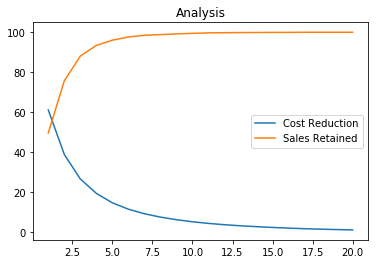

In [92]:
ll=list(range(1,21))
rl=[]
sl=[]
for i in ll:
    total_call = np.sum(df['campaign'])
    extra_call = np.sum(df[df['campaign']>i]['campaign']) - i*df[df['campaign']>i].shape[0]
    reduction = ( extra_call *100 ) / total_call
    rl.append(reduction)
    total_sale=np.float(df[df['y=yes']==1].shape[0])
    less_sale=np.float(df[(df['campaign'] <= i) & (df['y=yes']==1)].shape[0])
    percent=100*less_sale/total_sale
    sl.append(percent)
plt.plot(ll,rl,label="Cost Reduction")
plt.plot(ll,sl,label="Sales Retained")
plt.legend(loc="best")
plt.title("Analysis")
plt.show()

#### From the graph, it can clearly be seen that campaign calls should be dropped after call 5-7 to maximize both. Let's check those 3 values.

After 5 Calls
Reduction :  14.585736709722564
Retain of Sales percent :  99.97844827586206
After 6 Calls
Reduction :  11.384912154622993
Retain of Sales percent :  99.97844827586206
After 7 Calls
Reduction :  9.109820905119427
Retain of Sales percent :  99.97844827586206


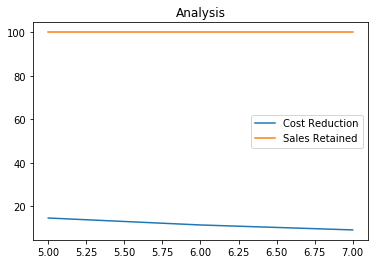

In [94]:
ll=list(range(5,8))
rl=[]
sl=[]
for i in ll:
    total_call = np.sum(df['campaign'])
    print("After %d Calls"%i)
    extra_call = np.sum(df[df['campaign']>i]['campaign']) - i*df[df['campaign']>i].shape[0]
    reduction = ( extra_call *100 ) / total_call
    print("Reduction : ",reduction)
    rl.append(reduction)
    total_sale=np.float(df[df['y=yes']==1].shape[0])
    less_sales=np.float(df[(df['campaign'] <= i) & (df['y=yes']==1)].shape[0])
    percent=100*less_sale/total_sale
    print("Retain of Sales percent : ",percent)
    sl.append(percent)
plt.plot(ll,rl,label="Cost Reduction")
plt.plot(ll,sl,label="Sales Retained")
plt.legend(loc="best")
plt.title("Analysis")
plt.show()

## Final Analysis :
### If we drop campaign calls after 6 times, our Reduction in Marketing Cost is 11.38%, in which we can acquire 97.6 % of the sales prospects.

## Part 2 : These are a few models which we can use for our future campaigns to successfully check whether a prospect will buy the product or not.

In [85]:
df2 = pd.get_dummies(df1,columns = df1.select_dtypes(include='object').columns,drop_first=True)
X = df2.iloc[:,:53]
y = df2.y_yes

### Using Logistic Regression : 

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=200)
logreg = LogisticRegression()
y_pred = logreg.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9135670583665145
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9177
           1       0.67      0.41      0.51      1120

   micro avg       0.91      0.91      0.91     10297
   macro avg       0.80      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



### Using K Nearest Neighbour Classifier :

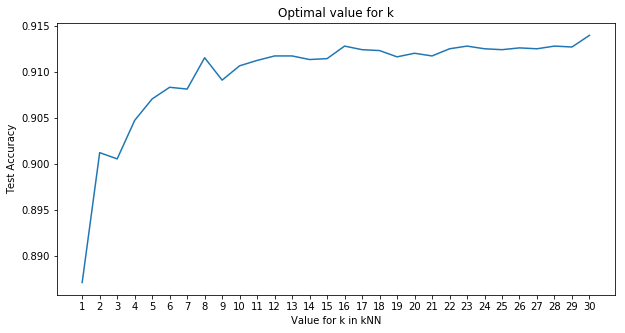

In [46]:
kl = range(1,31)
score = []
for k in kl:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = knn.fit(X_train,y_train).predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
plt.figure(figsize=(10,5))
plt.plot(kl,score)
plt.xlabel('Value for k in kNN')
plt.ylabel('Test Accuracy')
plt.xticks(kl)
plt.title('Optimal value for k')
plt.show()

In [87]:
knn = KNeighborsClassifier(n_neighbors=16)
y_pred = knn.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9127901330484607
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9177
           1       0.63      0.48      0.54      1120

   micro avg       0.91      0.91      0.91     10297
   macro avg       0.78      0.72      0.75     10297
weighted avg       0.90      0.91      0.91     10297

